# Task 6.5 Machine Learning

<a id='0'></a> <br>
 # Table of Contents  

1. [Import Data and Libraries](#1)
1. [Data Processing](#2)
1. [The Elbow Technique](#3)
1. [Silhouette Analysis](#4)
1. [K-means Clustering](#5)
1. [Visualizations](#6)
1. [Descriptive Statistics](#7)
1. [Statistical Facts](#8)
1. [Future Relevance](#9)

<a id='1'></a> <br>
## 1. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler # used to normalize a dataset
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.metrics import silhouette_score # allows use of silhouette coeffecient
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.5'

In [38]:
# set # of rows and columns to show

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

In [16]:
df_sbs_v7 = pd.read_pickle(os.path.join(path, '02 Data', 'Original Data', 'df_sbs_v7.pkl'))

In [18]:
df_sbs_v7.shape

(6538, 136)

In [19]:
df_sbs_v7.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (Yds.1),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (Yds.1),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category
0,ARI,43,ARI43,Aaron Francisco,47,25,DB,Defense,BYU,UT,7/5/1983,3,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,ARI43Aaron Francisco,1,3,40,31,3,1,4,77,43,3,0,54,1.85,27.3,4.17,31,43,377,3,1,2,3,64,112.3,12,33,0,9,31,377,3,194,2,1,1,-1,0,-1,3.0,66,52,14,1,0,0,0,5,91,29.5,0,32,2,34,17.0,0,34,3,3,0,0,5,180,36.0,45,Low Rush Att
1,ARI,43,ARI43,Adrian Wilson,24,29,SS,Defense,North Carolina St.,NC,10/12/1979,7,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,7,7,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,ARI43Adrian Wilson,1,1,22,19,0,1,5,123,50,0,0,54,1.85,27.3,4.17,31,43,377,3,1,2,3,64,112.3,12,33,0,9,31,377,3,194,2,1,1,-1,0,-1,3.0,66,52,14,1,0,0,0,5,91,29.5,0,32,2,34,17.0,0,34,3,3,0,0,5,180,36.0,45,Low Rush Att
2,ARI,43,ARI43,Alan Branch,78,24,DT,Defense,Michigan,MI,12/29/1984,1,XLIII,Arizona Cardinals,23,Santonio Holmes,Raymond James Stadium,Tampa,Florida,2/1/2009,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,

<a id='2'></a> <br>
## 2. Data Processing

>#### No cleaning needs to be performed (previously done).
>#### First attempts at k means failed because I believe too much of my data has 0 for values (not every player contributed equally).
>#### In order to perform the k means function with meaningful results, I am manipulating my data to focus on the stats of the colleges in the Super Bowl as a whole.
>>#### Another failed attempt.
>#### I am going back to my first attempt, which had slightly better results

### Multiple attempts have been fruitless. I am creating a new manipulated df that will have relevant data (no '0's in over 90% of the cells. 
#### See Task 6.5 Data Work notebook for all added columns
#### See Task 6.5 failed kmeans notebook for failed attempts

In [4]:
# import latest df (v9)

df_sbs_v9 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_v9.pkl'))

In [5]:
# check import

df_sbs_v9.shape

(6538, 191)

In [6]:
df_sbs_v9.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),...,Univ_SPT_Punting (Pnt),Univ_SPT_Punting (Yds),Univ_SPT_Punting (Y/P),Univ_SPT_Punting (Lng),Univ_Avg_Age_by_Team,Univ_Avg_Yrs_by_Team,Num_of_Univs,TEAM_total_yds,TEAM_total_tds,TEAM_total_turnovers
0,ARI,43,ARI43,Aaron Francisco,47,25,DB,Defense,BYU,UT,...,0.0,0.0,0.0,0.0,25.0,3.0,40,413,3,3
1,ARI,43,ARI43,Adrian Wilson,24,29,SS,Defense,North Carolina St.,NC,...,0.0,0.0,0.0,0.0,29.0,7.0,40,413,3,3
2,ARI,43,ARI43,Alan Branch,78,24,DT,Defense,Michigan,MI,...,0.0,0.0,0.0,0.0,26.8,3.6,40,413,3,3
3,ARI,43,ARI43,Gabe Watson,98,25,DT,Defense,Michigan,MI,...,0.0,0.0,0.0,0.0,26.8,3.6,40,413,3,3
4,ARI,43,ARI43,Jerame Tuman,84,32,TE,Offense,Michigan,MI,...,0.0,0.0,0.0,0.0,26.8,3.6,40,413,3,3


### Remove categorical columns by creating new df with just college stats

In [7]:
# create subset with college stats of each sb team

df_sbs_km = df_sbs_v9[['Player_Stats (Key)', 'Player_Stats (Pts)', 'Avg_Player_Age_by_Team', 'Avg_Player_Yrs_by_Team', 'Num_of_Univs', 'TEAM_O_Passing (Cmp)', 'TEAM_O_Passing (Att)', 'TEAM_O_Rushing (Att)', 'TEAM_O_Fumbles (Fmb)', 'TEAM_D_Interceptions (Int)', 'TEAM_D_Sacks (Sk)', 'TEAM_D_Fumbles (FR)', 'TEAM_D_Fumbles (FF)', 'TEAM_SPT_Scoring (FGM)', 'TEAM_SPT_Scoring (FGA)', 'TEAM_SPT_Punting (Pnt)', 'TEAM_total_yds', 'TEAM_total_tds', 'TEAM_total_turnovers']].copy()


In [8]:
# check new df

df_sbs_km.shape

(6538, 19)

In [9]:
df_sbs_km.head()

,Player_Stats (Key),Player_Stats (Pts),Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,Num_of_Univs,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Rushing (Att),TEAM_O_Fumbles (Fmb),TEAM_D_Interceptions (Int),TEAM_D_Sacks (Sk),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (FF),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_total_yds,TEAM_total_tds,TEAM_total_turnovers
0,ARI43,23,27.3,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3
1,ARI43,23,27.3,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3
2,ARI43,23,27.3,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3
3,ARI43,23,27.3,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3
4,ARI43,23,27.3,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3


In [10]:
# Drop all duplicate rows

df_sbs_km.drop_duplicates(inplace=True)

In [11]:
# check result

df_sbs_km.shape

(116, 19)

In [12]:
# drop the 'key' column
df_sbs_km.drop('Player_Stats (Key)', axis=1, inplace=True)

In [13]:
df_sbs_km.head()

,Player_Stats (Pts),Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,Num_of_Univs,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Rushing (Att),TEAM_O_Fumbles (Fmb),TEAM_D_Interceptions (Int),TEAM_D_Sacks (Sk),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (FF),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_total_yds,TEAM_total_tds,TEAM_total_turnovers
0,23,27.30,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3
54,27,27.18,4.07,44,21,30,25,0,1,2.0,1,1,2,2,3,336,3,3
114,21,26.28,3.74,37,9,19,46,2,3,7.0,3,0,2,4,4,377,2,2
157,25,27.54,4.54,44,25,40,23,1,0,3.0,0,0,1,2,3,391,3,3
213,16,25.33,2.83,42,9,14,57,3,3,0.0,4,0,0,1,7,357,2,2


In [14]:
# check for NaN values

df_sbs_km.isnull().sum()

Player_Stats (Pts)            0
Avg_Player_Age_by_Team        0
Avg_Player_Yrs_by_Team        0
Num_of_Univs                  0
TEAM_O_Passing (Cmp)          0
TEAM_O_Passing (Att)          0
TEAM_O_Rushing (Att)          0
TEAM_O_Fumbles (Fmb)          0
TEAM_D_Interceptions (Int)    0
TEAM_D_Sacks (Sk)             0
TEAM_D_Fumbles (FR)           0
TEAM_D_Fumbles (FF)           0
TEAM_SPT_Scoring (FGM)        0
TEAM_SPT_Scoring (FGA)        0
TEAM_SPT_Punting (Pnt)        0
TEAM_total_yds                0
TEAM_total_tds                0
TEAM_total_turnovers          0
dtype: int64

<a id='3'></a> <br>
## 3. The Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_sbs_km).score(df_sbs_km) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-829843.0767517241,
 -398948.51321442303,
 -227591.02804316406,
 -143367.3762287093,
 -110904.1613871069,
 -89624.68583687213,
 -77703.3637756355,
 -69986.01472864054,
 -60423.25711324396]

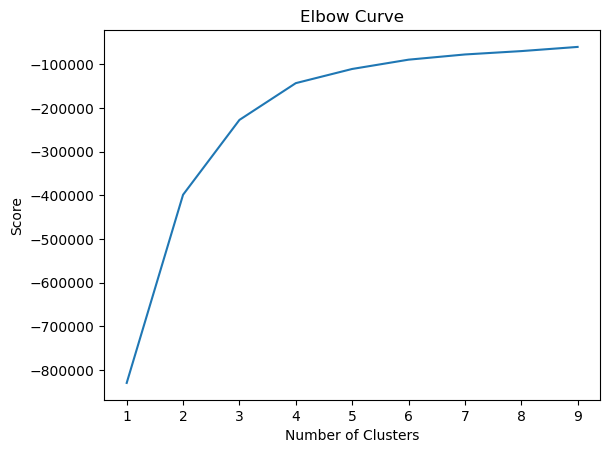

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The elbow seems to develop at either 3 or 4 so I will run Silhouette Analysis to find the optima k

<a id='4'></a> <br>
## 4. Silhouette Analysis

C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

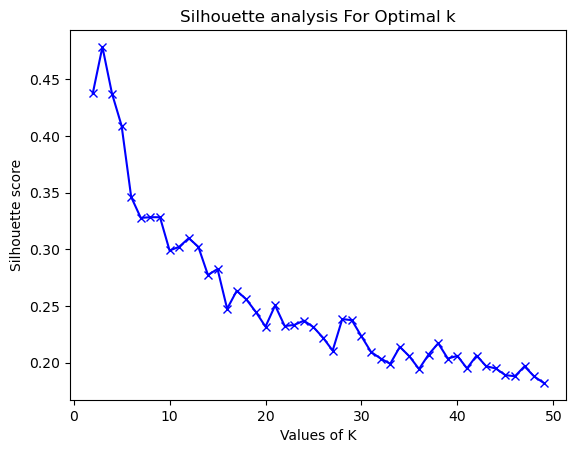

3


In [18]:
# Create a list of cluster sizes to try and find the optimal-k
cluster_sizes = range(2, 50)

# Calculate the silhouette coefficient for each cluster size
silhouette_scores = []
for cluster_size in cluster_sizes:
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', n_init=10) # k-means++, which selects the initial cluster centers based on the distance between data points - smarter iniialization method
    kmeans.fit(df_sbs_km)
    sil_score = silhouette_score(df_sbs_km, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Find the cluster size with the highest silhouette coefficient
optimal_cluster_size = cluster_sizes[np.argmax(silhouette_scores)]

# plot sil scores

plt.plot(cluster_sizes,silhouette_scores,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

print(optimal_cluster_size)

#### The optimal number of clusters fot this data set is 3. 
##### Note: After several manipulations of my data set this is the highest Silhouette score I've found (~0.5), and due to the fact that my data set's range is fairly small AND all units are compatible, I chose not to Standardize. When I did, I got very poor Silhouette Scores.

<a id='5'></a> <br>
## 5. K-means Clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_sbs_km)

C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
df_sbs_km['clusters'] = kmeans.fit_predict(df_sbs_km)

C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pjbac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df_sbs_km.head()

,Player_Stats (Pts),Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,Num_of_Univs,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Rushing (Att),TEAM_O_Fumbles (Fmb),TEAM_D_Interceptions (Int),TEAM_D_Sacks (Sk),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (FF),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_total_yds,TEAM_total_tds,TEAM_total_turnovers,clusters
0,23,27.30,4.17,40,31,43,12,2,1,3.0,1,0,0,0,5,413,3,3,0
54,27,27.18,4.07,44,21,30,25,0,1,2.0,1,1,2,2,3,336,3,3,0
114,21,26.28,3.74,37,9,19,46,2,3,7.0,3,0,2,4,4,377,2,2,0
157,25,27.54,4.54,44,25,40,23,1,0,3.0,0,0,1,2,3,391,3,3,0
213,16,25.33,2.83,42,9,14,57,3,3,0.0,4,0,0,1,7,357,2,2,0


In [23]:
df_sbs_km['clusters'].value_counts()

clusters
0    75
1    27
2    14
Name: count, dtype: int64

In [24]:
path_2 = r'G:\My Drive\CareerFoundry\Python Projects'

In [31]:
df_sbs_km.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_km.pkl'))

In [36]:
df_sbs_v10 = pd.read_pickle(r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.6\02 Data\Prepared Data\df_sbs_v10.pkl')

In [37]:
df_sbs_v10.shape

(6538, 195)

In [39]:
df_sbs_v10.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (-Yds),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (-Yds),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category,Univ_O_Passing (Cmp),Univ_O_Passing (Att),Univ_O_Passing (Yds),Univ_O_Passing (TD),Univ_O_Passing (Int),Univ_O_Passing (Sk),Univ_O_Passing (-Yds),Univ_O_Passing (Lng),Univ_O_Passing (Rate),Univ_O_Rushing (Att),Univ_O_Rushing (Yds),Univ_O_Rushing (TD),Univ_O_Rushing (Lng),Univ_O_Receiving (Rec),Univ_O_Receiving (Yds),Univ_O_Receiving (TD),Univ_O_Receiving (Lng),Univ_O_Fumbles (Fmb),Univ_O_Fumbles (FL),Univ_D_Interceptions (Int),Univ_D_Interceptions (Yds),Univ_D_Interceptions (TD),Univ_D_Interceptions (Lng),Univ_D_Sacks (Sk),Univ_D_Tackles (Comb),Univ_D_Tackles (Solo),Univ_D_Tackles (Ast),Univ_D_Fumbles (FR),Univ_D_Fumbles (Yds),Univ_D_Fumbles (TD),Univ_D_Fumbles (FF),Univ_SPT_Kick_Returns (Rt),Univ_SPT_Kick_Returns (Yds),Univ_SPT_Kick_Returns (Y/Rt),Univ_SPT_Kick_Returns (TD),Univ_SPT_Kick_Returns (Lng),Univ_SPT_Punt_Returns (Ret),Univ_SPT_Punt_Returns (Yds),Univ_SPT_Punt_Returns (Y/R),Univ_SPT_Punt_Returns (TD),Univ_SPT_Punt_Returns (Lng),Univ_SPT_Scoring (XPM),Univ_SPT_Scoring (XPA),Univ_SPT_Scoring (FGM),Univ_SPT_Scoring (FGA),Univ_SPT_Punting (Pnt),Univ_SPT_Punting (Yds),Univ_SPT_Punting (Y/P),Univ_SPT_Punting (Lng),Univ_Avg_Age_by_Team,Univ_Avg_Yrs_by_Team,Num_of_Univs,TEAM_total_yds,TEAM_total_tds,TEAM_total_turnover

In [40]:
# merge and add clusters col to v10

df_sbs_v11 = df_sbs_v10.merge(df_sbs_km, on=['Player_Stats (Pts)', 'Avg_Player_Age_by_Team', 'Avg_Player_Yrs_by_Team', 'Num_of_Univs', 'TEAM_O_Passing (Cmp)', 'TEAM_O_Passing (Att)', 'TEAM_O_Rushing (Att)', 'TEAM_O_Fumbles (Fmb)', 'TEAM_D_Interceptions (Int)', 'TEAM_D_Sacks (Sk)', 'TEAM_D_Fumbles (FR)', 'TEAM_D_Fumbles (FF)', 'TEAM_SPT_Scoring (FGM)', 'TEAM_SPT_Scoring (FGA)', 'TEAM_SPT_Punting (Pnt)', 'TEAM_total_yds', 'TEAM_total_tds', 'TEAM_total_turnovers'], how='left')

In [41]:
df_sbs_v11.shape

(6538, 196)

In [42]:
df_sbs_v11.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (-Yds),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (-Yds),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category,Univ_O_Passing (Cmp),Univ_O_Passing (Att),Univ_O_Passing (Yds),Univ_O_Passing (TD),Univ_O_Passing (Int),Univ_O_Passing (Sk),Univ_O_Passing (-Yds),Univ_O_Passing (Lng),Univ_O_Passing (Rate),Univ_O_Rushing (Att),Univ_O_Rushing (Yds),Univ_O_Rushing (TD),Univ_O_Rushing (Lng),Univ_O_Receiving (Rec),Univ_O_Receiving (Yds),Univ_O_Receiving (TD),Univ_O_Receiving (Lng),Univ_O_Fumbles (Fmb),Univ_O_Fumbles (FL),Univ_D_Interceptions (Int),Univ_D_Interceptions (Yds),Univ_D_Interceptions (TD),Univ_D_Interceptions (Lng),Univ_D_Sacks (Sk),Univ_D_Tackles (Comb),Univ_D_Tackles (Solo),Univ_D_Tackles (Ast),Univ_D_Fumbles (FR),Univ_D_Fumbles (Yds),Univ_D_Fumbles (TD),Univ_D_Fumbles (FF),Univ_SPT_Kick_Returns (Rt),Univ_SPT_Kick_Returns (Yds),Univ_SPT_Kick_Returns (Y/Rt),Univ_SPT_Kick_Returns (TD),Univ_SPT_Kick_Returns (Lng),Univ_SPT_Punt_Returns (Ret),Univ_SPT_Punt_Returns (Yds),Univ_SPT_Punt_Returns (Y/R),Univ_SPT_Punt_Returns (TD),Univ_SPT_Punt_Returns (Lng),Univ_SPT_Scoring (XPM),Univ_SPT_Scoring (XPA),Univ_SPT_Scoring (FGM),Univ_SPT_Scoring (FGA),Univ_SPT_Punting (Pnt),Univ_SPT_Punting (Yds),Univ_SPT_Punting (Y/P),Univ_SPT_Punting (Lng),Univ_Avg_Age_by_Team,Univ_Avg_Yrs_by_Team,Num_of_Univs,TEAM_total_yds,TEAM_total_tds,TEAM_total_turnover

In [43]:
df_sbs_v11['clusters'].value_counts()

clusters
0    4286
1    1391
2     861
Name: count, dtype: int64

In [44]:
df_sbs_v11.to_pickle(r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.6\02 Data\Prepared Data\df_sbs_v10.pkl')

In [45]:
df_sbs_v10 = pd.read_pickle(r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.6\02 Data\Prepared Data\df_sbs_v10.pkl')

In [46]:
df_sbs_v10.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (-Yds),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (-Yds),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category,Univ_O_Passing (Cmp),Univ_O_Passing (Att),Univ_O_Passing (Yds),Univ_O_Passing (TD),Univ_O_Passing (Int),Univ_O_Passing (Sk),Univ_O_Passing (-Yds),Univ_O_Passing (Lng),Univ_O_Passing (Rate),Univ_O_Rushing (Att),Univ_O_Rushing (Yds),Univ_O_Rushing (TD),Univ_O_Rushing (Lng),Univ_O_Receiving (Rec),Univ_O_Receiving (Yds),Univ_O_Receiving (TD),Univ_O_Receiving (Lng),Univ_O_Fumbles (Fmb),Univ_O_Fumbles (FL),Univ_D_Interceptions (Int),Univ_D_Interceptions (Yds),Univ_D_Interceptions (TD),Univ_D_Interceptions (Lng),Univ_D_Sacks (Sk),Univ_D_Tackles (Comb),Univ_D_Tackles (Solo),Univ_D_Tackles (Ast),Univ_D_Fumbles (FR),Univ_D_Fumbles (Yds),Univ_D_Fumbles (TD),Univ_D_Fumbles (FF),Univ_SPT_Kick_Returns (Rt),Univ_SPT_Kick_Returns (Yds),Univ_SPT_Kick_Returns (Y/Rt),Univ_SPT_Kick_Returns (TD),Univ_SPT_Kick_Returns (Lng),Univ_SPT_Punt_Returns (Ret),Univ_SPT_Punt_Returns (Yds),Univ_SPT_Punt_Returns (Y/R),Univ_SPT_Punt_Returns (TD),Univ_SPT_Punt_Returns (Lng),Univ_SPT_Scoring (XPM),Univ_SPT_Scoring (XPA),Univ_SPT_Scoring (FGM),Univ_SPT_Scoring (FGA),Univ_SPT_Punting (Pnt),Univ_SPT_Punting (Yds),Univ_SPT_Punting (Y/P),Univ_SPT_Punting (Lng),Univ_Avg_Age_by_Team,Univ_Avg_Yrs_by_Team,Num_of_Univs,TEAM_total_yds,TEAM_total_tds,TEAM_total_turnover

In [47]:
df_sbs_v10.shape

(6538, 196)

<a id='6'></a> <br>
## 6. Visualizations

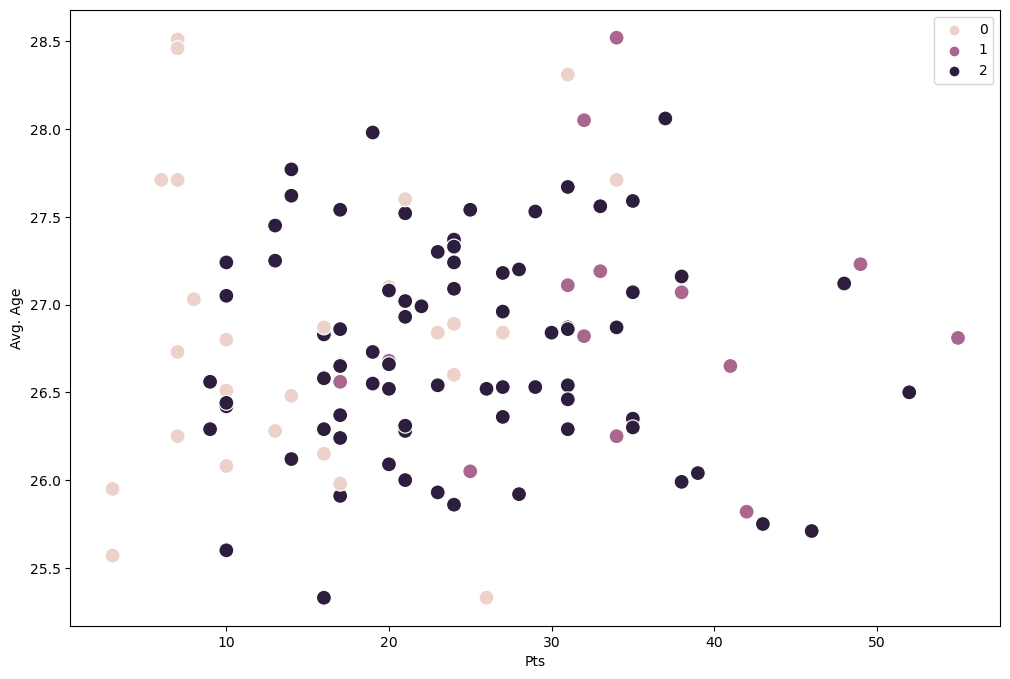

In [229]:
# Plot the clusters for the 'Pts' and 'avg_age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['Avg_Player_Age_by_Team'], hue=kmeans.labels_, s=116) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Avg. Age') # Label y-axis.
plt.show()

>### No patterns to be found

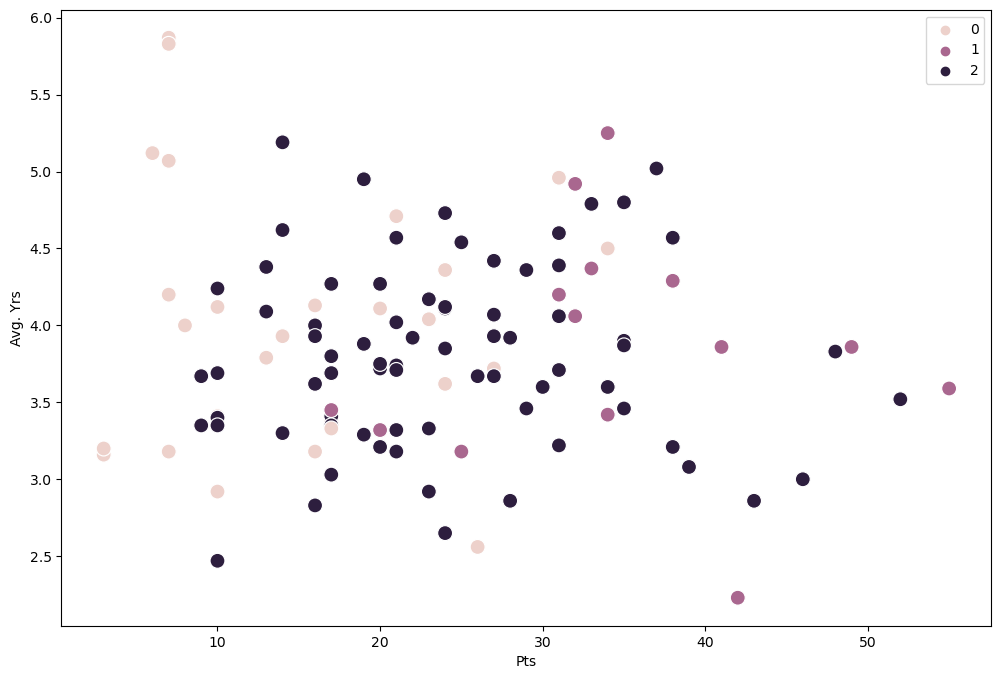

In [230]:
# Plot the clusters for the 'Pts' and 'avg_yrs' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['Avg_Player_Yrs_by_Team'], hue=kmeans.labels_, s=116) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Avg. Yrs') # Label y-axis.
plt.show()

>### No patterns to be found

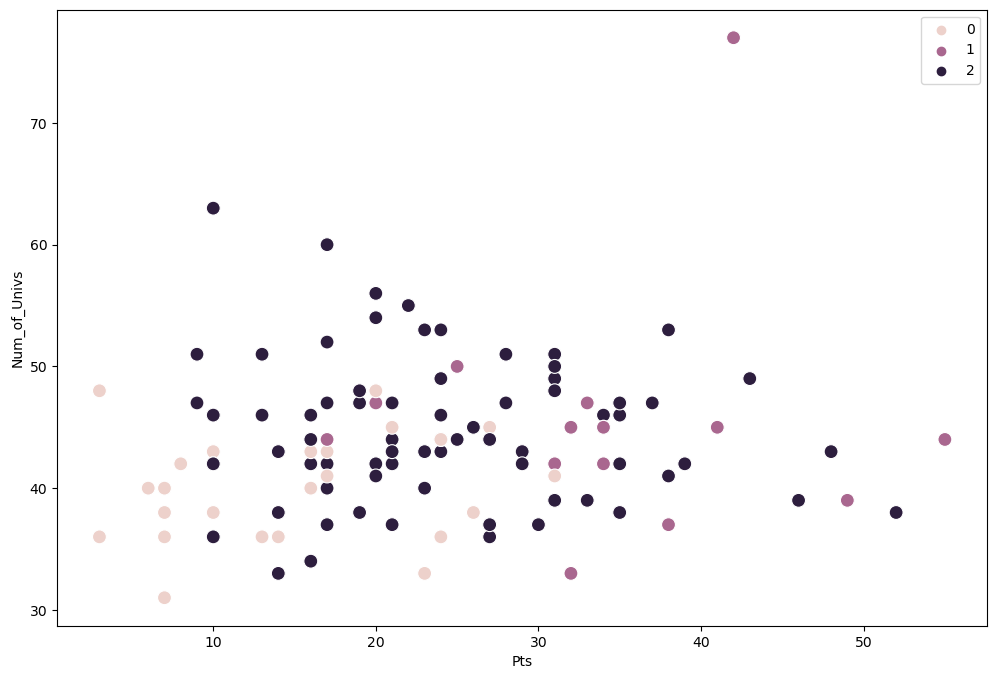

In [225]:
# Plot the clusters for the 'Pts' and 'Num_of_Univs' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['Num_of_Univs'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Num_of_Univs') # Label y-axis.
plt.show()

>### No patterns to be found

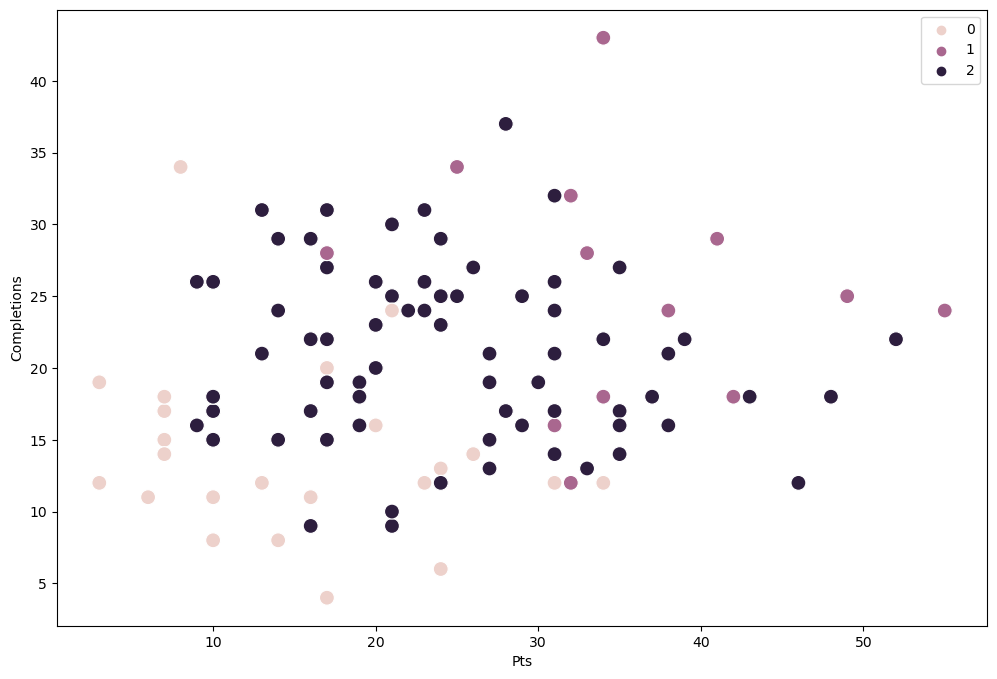

In [231]:
# Plot the clusters for the 'Pts' and 'TEAM_O_Passing (Cmp)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['TEAM_O_Passing (Cmp)'], hue=kmeans.labels_, s=116) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Completions') # Label y-axis.
plt.show()

>### No patterns to be found

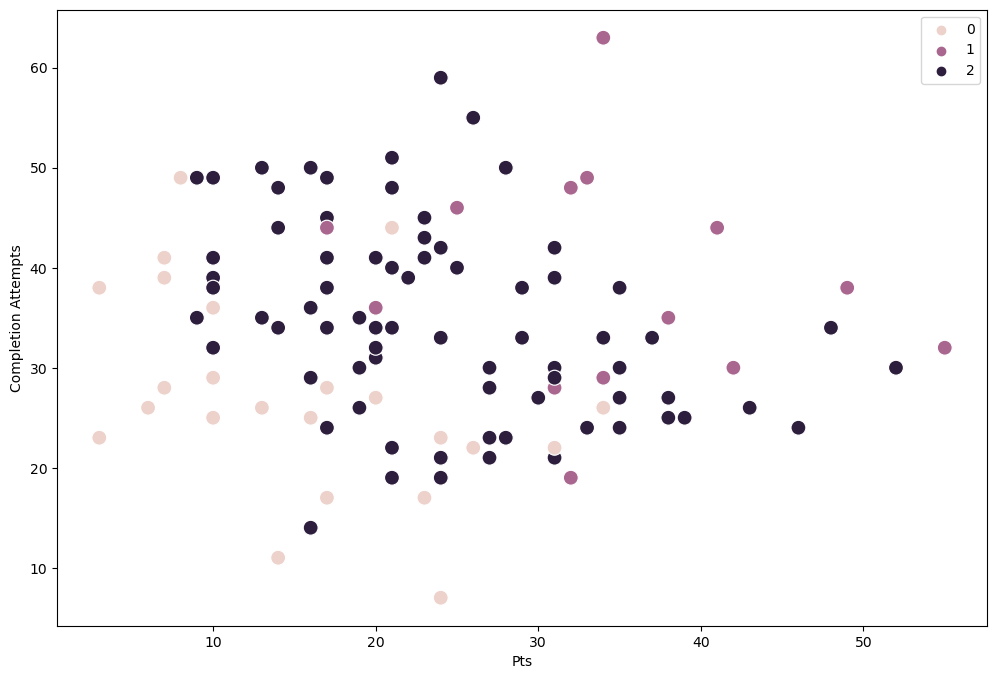

In [232]:
# Plot the clusters for the 'Pts' and 'TEAM_O_Passing (Att)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['TEAM_O_Passing (Att)'], hue=kmeans.labels_, s=116) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Completion Attempts') # Label y-axis.
plt.show()

>### No patterns to be found

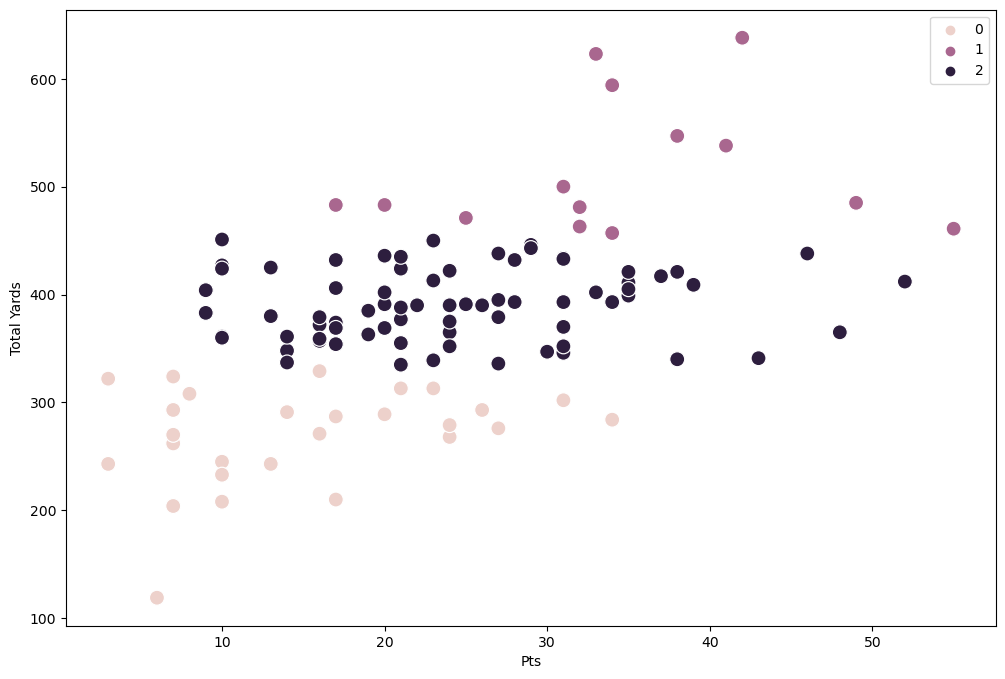

In [233]:
# Plot the clusters for the 'Pts' and 'TEAM_total_yds' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['TEAM_total_yds'], hue=kmeans.labels_, s=116) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Total Yards') # Label y-axis.
plt.show()

>### This is the first scatterplot to reveal any trend or correlation, which makes sense because in a football game, the more yards your team has, the more chances they will have to score and therefore, most likely have a higher total amount points.

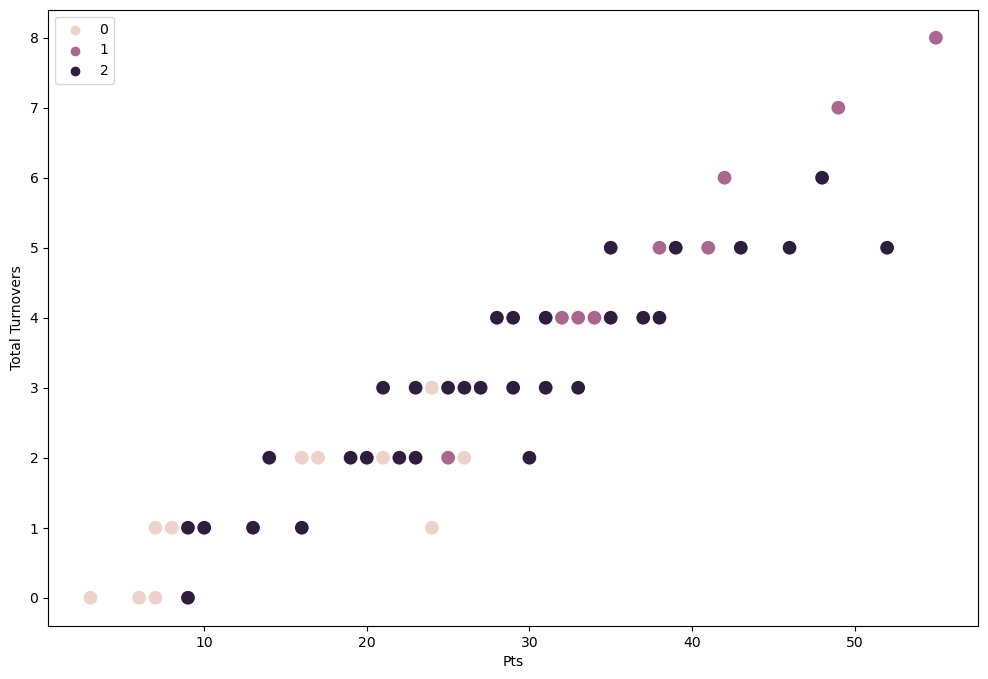

In [234]:
# Plot the clusters for the 'Pts' and 'TEAM_total_turnovers' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sbs_km['Player_Stats (Pts)'], y=df_sbs_km['TEAM_total_turnovers'], hue=kmeans.labels_, s=116) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pts') # Label x-axis.
plt.ylabel('Total Turnovers') # Label y-axis.
plt.show()

>### The trend here shows that the more turnovers a team has, the more points they have, which does not make sense. Further investigation would be needed to discover why this is.

<a id='7'></a> <br>
## 7. Descriptive Statistics

In [236]:
df_sbs_km.loc[df_sbs_km['clusters'] == 2, 'cluster'] = 'dark purple'
df_sbs_km.loc[df_sbs_km['clusters'] == 1, 'cluster'] = 'purple'
df_sbs_km.loc[df_sbs_km['clusters'] == 0, 'cluster'] = 'pink'

In [238]:
df_sbs_km.groupby('cluster').agg({'Player_Stats (Pts)':['mean', 'median'], 
                         'Avg_Player_Age_by_Team':['mean', 'median'], 
                         'Avg_Player_Yrs_by_Team':['mean', 'median'],
                         'Num_of_Univs':['mean', 'median'], 
                         'TEAM_O_Passing (Cmp)':['mean', 'median'], 
                         'TEAM_O_Passing (Att)':['mean', 'median'], 
                         'TEAM_O_Rushing (Att)':['mean', 'median'],
                         'TEAM_O_Fumbles (Fmb)':['mean', 'median'],
                         'TEAM_D_Sacks (Sk)':['mean', 'median'], 
                         'TEAM_D_Fumbles (FR)':['mean', 'median'], 
                         'TEAM_D_Fumbles (FF)':['mean', 'median'], 
                         'TEAM_SPT_Scoring (FGM)':['mean', 'median'], 
                         'TEAM_SPT_Scoring (FGA)':['mean', 'median'], 
                         'TEAM_O_Passing (Att)':['mean', 'median'], 
                         'TEAM_O_Rushing (Att)':['mean', 'median'], 
                         'TEAM_O_Fumbles (Fmb)':['mean', 'median'], 
                         'TEAM_SPT_Punting (Pnt)':['mean', 'median'], 
                         'TEAM_total_yds':['mean', 'median'], 
                         'TEAM_total_tds':['mean', 'median'], 
                         'TEAM_total_turnovers':['mean', 'median']})

Player_Stats (Pts)        Avg_Player_Age_by_Team          \
                          mean median                   mean  median   
cluster                                                                
dark purple          24.173333   23.0              26.741333  26.660   
pink                 15.111111   14.0              26.850000  26.800   
purple               34.500000   33.5              26.915000  26.815   

            Avg_Player_Yrs_by_Team        Num_of_Univs         \
                              mean median         mean median   
cluster                                                         
dark purple               3.801867   3.75    44.720000   44.0   
pink                      4.014815   4.00    40.296296   40.0   
purple                    3.857143   3.86    45.500000   44.5   

            TEAM_O_Passing (Cmp)        TEAM_O_Passing (Att)         \
                            mean median                 mean median   
cluster                                                               
dark purple            21.013333   21.0            34.760000   34.0   
pink                   14.185185   13.0            27.148148   26.0   
purple                 25.285714   24.5            38.642857   37.0   

            TEAM_O_Rushing (Att)        TEAM_O_Fumbles (Fmb)         \
                            mean median                 mean median   
cluster                                                               
dark purple            28.226667   28.0             1.226667    1.0   
pink                   26.629630   25.0             1.370370    1.0   
purple                 32.928571   31.0             1.285714    1.0   

            TEAM_D_Sacks (Sk)        TEAM_D_Fumbles (FR)         \
                         mean median                mean median   
cluster                                                           
dark purple          2.540000    2.0            1.506667    1.0   
pink                 2.481481    2.0            1.814815    2.0   
purple               2.857143    2.0            1.428571    1.0   

            TEAM_D_Fumbles (FF)        TEAM_SPT_Scoring (FGM)         \
                           mean median                   mean median   
cluster                                                                
dark purple            0.520000    0.0               1.386667    1.0   
pink                   0.370370    0.0               1.185185    1.0   
purple                 0.428571    0.0               1.642857    2.0   

            TEAM_SPT_Scoring (FGA)        TEAM_SPT_Punting (Pnt)         \
                              mean median                   mean median   
cluster                                                                   
dark purple               1.800000    2.0               4.440000    4.0   
pink                      1.555556    1.0               5.629630    5.0   
purple                    2.428571    3.0               3.357143    4.0   

            TEAM_total_yds        TEAM_total_tds        TEAM_total_turnovers  \
                      mean median           mean median                 mean   
cluster                                                                        
dark purple     390.000000  390.0       2.760000    3.0             2.760000   
pink            269.592593  279.0       1.518519    1.0             1.518519   
purple          516.000000  484.0       4.285714    4.0             4.285714   

                    
            median  
cluster             
dark purple    3.0  
pink           1.0  
purple         4.0

<a id='8'></a> <br>
## 8. Statistical Facts
>### The Purple cluster has the best statistics. Highest median in: Points (significantly), Passing attempts and completions, Rushing attempts, Field Goal attempts, Field Goals made, Total yards, Total TDs. Low(est) in: Punts (less punts means more first downs and scores), Fumbles.
>### Irrelevant factors: Avg_age, Avg_yrs, Num_of_Univs, Sacks, Fumble recoveries, Forced fumbles, Total turnovers.
>### These findings lend credibility to the source of the data, as this kind of outcome is expected in the statistics of a football game.

<a id='9'></a> <br>
## 9. Future Relevance
>### The results found here could be useful, or very interesting and entertaining at the very least, in helping to pinpoint where a team's weaknesses are which would be useful to improve one's own team and prepare when playing an opponent. More data would be needed to fine tune these results (i.e., a full season of statistics). 